Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [1]:
import numpy as np
import pandas as pd

In [22]:
# Load the data from github
url = 'https://raw.githubusercontent.com/laguz/stock_csv/master/AAPL.csv'
df = pd.read_csv(url)

In [44]:
# Take a look at the data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price_Change,Volume_Change,Percentage_Change,Up_Down
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0,-0.006696,-293148800.0,-5.217066,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0,-0.008929,-70156800.0,-7.339789,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0,0.002790,-19286400.0,2.475094,1.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0,0.003349,-12992000.0,2.899241,1.0
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.099500,48630400.0,0.007254,-24819200.0,6.102876,1.0


In [25]:
# Add the price change feature
df['Price_Change'] = df['Close'] - df['Close'].shift(1)

In [26]:
# Add the price change feature
df['Volume_Change'] = df['Volume'] - df['Volume'].shift(1)

In [27]:
# Add the price change feature
df['Percentage_Change'] = (((df['Close'] / df['Close'].shift(1))-1)*100)

In [28]:
# Drop the any create from the three features from above
df.dropna(how='any', inplace=True)

In [39]:
# Create the target feature to predict.
# I want to know if the market up or down.
df.loc[df['Price_Change'] >= 0, 'Up_Down'] = 1
df.loc[df['Price_Change'] < 0, 'Up_Down'] = 0
df['Up_Down'].value_counts(normalize=True)

1.0    0.532284
0.0    0.467716
Name: Up_Down, dtype: float64

In [ ]:
# Choose your target. Which column in your tabular dataset will you predict?
# I will predict Up_Down

In [ ]:
# Is your problem regression or classification?
# It will be a regression

In [ ]:
# How is your target distributed?
# The majority class frequency is 53%

In [ ]:
# My evaluation metrics.
# Accuracy and Mean Absolute Error

In [ ]:
# I will train from 1980 to 2004, validate from 2005 to 2014, and test from 2015 to 2019
# I will do time base split.

In [ ]:
####################### Fisnish retro 1 ####################

In [ ]:
####################### Start retro 2 ####################

In [38]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,Price_Change,Volume_Change,Percentage_Change,Up_Down
Open,1.000000,0.999925,0.999890,0.999834,0.999037,-0.142985,0.073012,0.000022,0.006152,0.006974
High,0.999925,1.000000,0.999850,0.999906,0.999188,-0.142030,0.077058,0.000334,0.007697,0.008775
Low,0.999890,0.999850,1.000000,0.999909,0.999049,-0.144600,0.079281,-0.000604,0.008238,0.009581
Close,0.999834,0.999906,0.999909,1.000000,0.999224,-0.143333,0.086221,-0.000235,0.010396,0.011715
Adj Close,0.999037,0.999188,0.999049,0.999224,1.000000,-0.150070,0.087418,-0.000218,0.010495,0.012193
Volume,-0.142985,-0.142030,-0.144600,-0.143333,-0.150070,1.000000,-0.024280,0.331483,0.000149,0.000723
Price_Change,0.073012,0.077058,0.079281,0.086221,0.087418,-0.024280,1.000000,-0.022605,0.304645,0.290182
Volume_Change,0.000022,0.000334,-0.000604,-0.000235,-0.000218,0.331483,-0.022605,1.000000,-0.009897,0.018325
Percentage_Change,0.006152,0.007697,0.008238,0.010396,0.010495,0.000149,0.304645,-0.009897,1.000000,0.686759
Up_Down,0.006974,0.008775,0.009581,0.011715,0.012193,0.000723,0.290182,0.018325,0.686759,1.000000


In [40]:
df.shape

(10036, 11)

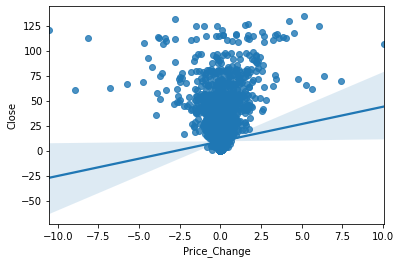

In [11]:
# Import seaborn and matplotlib with the standard aliases
import seaborn as sns
import matplotlib.pyplot as plt

# Load the example penguins dataset
aapl = df

# Create a "regplot"
sns.regplot(x="Price_Change", y="Close", data=aapl, fit_reg=True)
plt.savefig('penguin_reg.png', transparent=False, dpi=100)
plt.show()

In [12]:
target = 'Close'

X = df.drop([target,'Date'],axis=1)

y = df[target]


In [13]:
X.shape, y.shape

((10036, 9), (10036,))

In [14]:
# Import the predictor class
from sklearn.linear_model import LinearRegression

# Instantiate the class (with default parameters)
model = LinearRegression()

# Dispay the model parameters
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# Fit the model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Slope (also called the model coefficient)
print(model.coef_)

# Intercept
print(model.intercept_)

# In equation form
print(f'\nbody_mass_g = {model.coef_[0]} x flipper_length_mm + ({model.intercept_})')

[-1.75454283e-01  6.19628146e-01  5.31267033e-01  2.41782482e-02
  8.86812845e-12  2.84418385e-01 -1.69873637e-12 -1.45363021e-03
  8.10601275e-03]
0.0014135130943913055

body_mass_g = -0.1754542833150572 x flipper_length_mm + (0.0014135130943913055)


In [17]:
# Import the feature selector utility
from sklearn.feature_selection import SelectKBest, f_regression

# Create the selector object with the best k=1 features
selector = SelectKBest(score_func=f_regression, k=3)

# Run the selector on the training data
X_train_selected = selector.fit_transform(X, y)

# Find the features that was selected
selected_mask = selector.get_support()
all_features = X.columns
selected_feature = all_features[selected_mask]

print('The selected feature: ', selected_feature)

The selected feature:  Index(['Open', 'High', 'Low'], dtype='object')


In [18]:
df['Price_Change']

1       -0.006696
2       -0.008929
3        0.002790
4        0.003349
5        0.007254
           ...   
10034   -0.870003
10035    1.720002
10036    0.980003
10037   -3.770004
10038    3.480003
Name: Price_Change, Length: 10036, dtype: float64

In [19]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price_Change,Volume_Change,Percentage_Change,Up_Down
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0,-0.006696,-293148800.0,-5.217066,False
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0,-0.008929,-70156800.0,-7.339789,False
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0,0.002790,-19286400.0,2.475094,True
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0,0.003349,-12992000.0,2.899241,True
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.099500,48630400.0,0.007254,-24819200.0,6.102876,True
